In [17]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Internship_Unified_Mentor/Datasets/Amazon Sales data.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully.


##Transform

In [18]:
try:
    # Convert the 'Order Date' and 'Ship Date' columns to datetime format
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])

    # Extract year and month from the 'Order Date'
    df['year'] = df['Order Date'].dt.year
    df['month'] = df['Order Date'].dt.month
    df['year_month'] = df['Order Date'].dt.to_period('M')

    # Handle missing values (if any)
    df.fillna(0, inplace=True)

    print("Data transformation successful.")
except Exception as e:
    print(f"Error during data transformation: {e}")


Data transformation successful.


##Load

In [21]:
try:
    # Convert the 'Order Date' and 'Ship Date' columns to datetime format
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])

    # Extract year and month from the 'Order Date'
    df['year'] = df['Order Date'].dt.year
    df['month'] = df['Order Date'].dt.month
    df['year_month'] = df['Order Date'].dt.to_period('M')

    # Handle missing values (if any)
    df.fillna(0, inplace=True)

    # Create a new DataFrame for cleaned data
    cleaned_df = df.copy()

    print("Data transformation successful.")
except Exception as e:
    print(f"Error during data transformation: {e}")


Data transformation successful.


##Analysis and Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Define a function to plot the line graph with enhanced features
def plot_sales_trend(x, y, title, xlabel, ylabel, xticks_rotation=0):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(rotation=xticks_rotation, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()



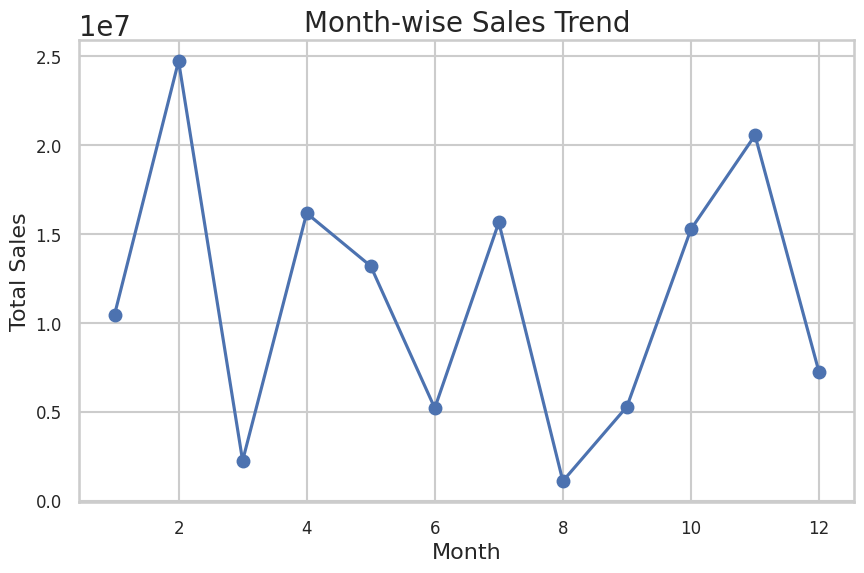

In [30]:
# Month-wise Sales Trend
try:
    month_wise_sales = cleaned_df.groupby('month')['Total Revenue'].sum()
    plot_sales_trend(month_wise_sales.index, month_wise_sales.values,
                     'Month-wise Sales Trend', 'Month', 'Total Sales')
except Exception as e:
    print(f"Error plotting month-wise sales trend: {e}")

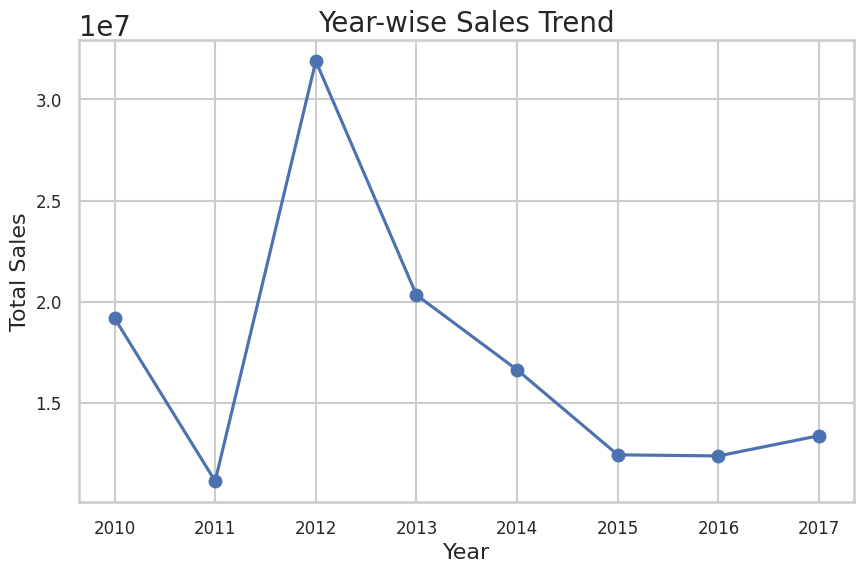

In [31]:
# Year-wise Sales Trend
try:
    year_wise_sales = cleaned_df.groupby('year')['Total Revenue'].sum()
    plot_sales_trend(year_wise_sales.index, year_wise_sales.values,
                     'Year-wise Sales Trend', 'Year', 'Total Sales')
except Exception as e:
    print(f"Error plotting year-wise sales trend: {e}")

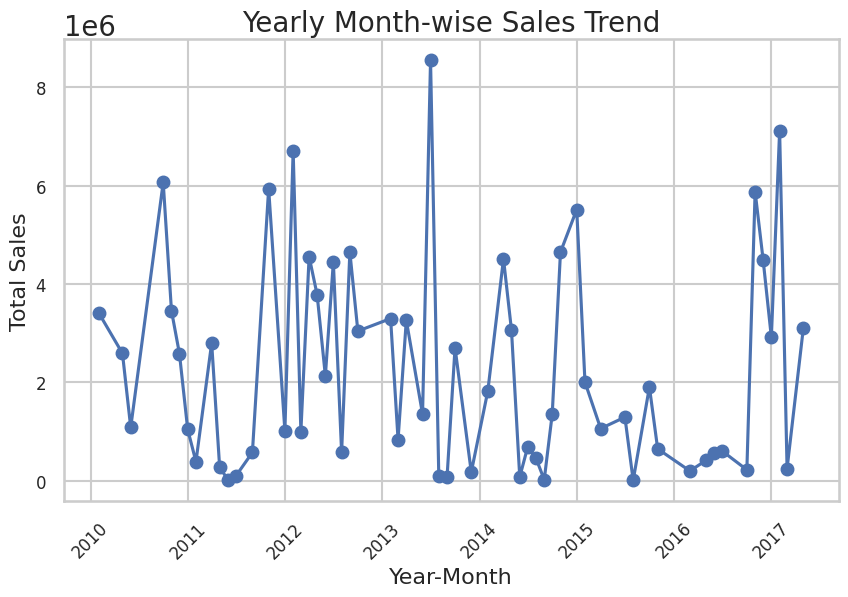

In [32]:
# Yearly Month-wise Sales Trend
try:
    year_month_wise_sales = cleaned_df.groupby('year_month')['Total Revenue'].sum()
    plot_sales_trend(year_month_wise_sales.index.to_timestamp(), year_month_wise_sales.values,
                     'Yearly Month-wise Sales Trend', 'Year-Month', 'Total Sales', xticks_rotation=45)
except Exception as e:
    print(f"Error plotting yearly month-wise sales trend: {e}")

**Key Metrics and Relationships**

Total Sales: 137348768.31
Average Sales: 1373487.6831
Median Sales: 752314.36
Standard Deviation of Sales: 1460028.7068235008
Correlation Matrix:
               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   

               Total Cost  Total Profit  
Order ID        -0.328944     -0.234638  
Units Sold       0.374746      0.564550  
Unit Price       0.787905      0.557365  
Unit Cost        0.774895      0.467214  
Total Revenue    0.983928  

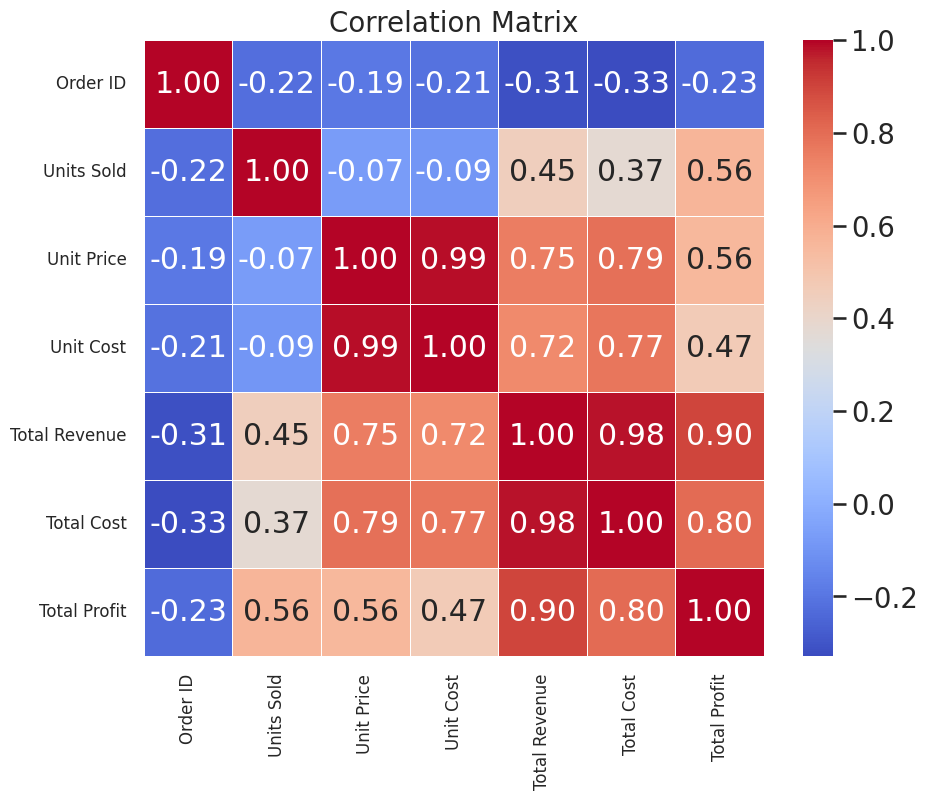

In [34]:
try:
    # Calculate key metrics
    total_sales = cleaned_df['Total Revenue'].sum()
    average_sales = cleaned_df['Total Revenue'].mean()
    median_sales = cleaned_df['Total Revenue'].median()
    std_sales = cleaned_df['Total Revenue'].std()

    print(f'Total Sales: {total_sales}')
    print(f'Average Sales: {average_sales}')
    print(f'Median Sales: {median_sales}')
    print(f'Standard Deviation of Sales: {std_sales}')

    # Select only numeric columns for correlation analysis
    numeric_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

    # Correlation analysis
    correlation_matrix = numeric_df.corr()

    # Display correlation matrix
    print('Correlation Matrix:')
    print(correlation_matrix)

    # Plotting correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix', fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
except Exception as e:
    print(f"Error calculating metrics or plotting correlation matrix: {e}")
